CCMC scoreboard API

In [10]:
import json
import os
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

from sunpy.time import parse_time

os.system('pwd')

os.system('curl https://kauai.ccmc.gsfc.nasa.gov/CMEscoreboard/WS/get/predictions > data/ccmc/ATSB.json')

/Users/chris/python/heliocats


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4379k  100 4379k    0     0   738k      0  0:00:05  0:00:05 --:--:--  957k


0

In [11]:
f = open('data/ccmc/ATSB.json')
data = json.load(f)

#data

In [17]:
import os
import json
os.system('curl https://kauai.ccmc.gsfc.nasa.gov/CMEscoreboard/WS/get/predictions > data/ccmc/ATSB.json')
f = open('ATSB.json')
data = json.load(f)
for entry in data:
    for pred in entry['predictions']:
        print (entry['arrivalTime'], pred['predictedArrivalTime'])

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  1 4379k    1 81840    0     0  18672      0  0:04:00  0:00:04  0:03:56 18672

2024-06-28T09:09Z 2024-06-28T14:04Z
2024-06-28T09:09Z 2024-06-28T21:00Z
2024-06-28T09:09Z 2024-06-28T01:55Z
2024-06-28T09:09Z 2024-06-28T21:00Z
2024-06-28T09:09Z 2024-06-28T23:30Z
2024-06-28T09:09Z 2024-06-28T18:00Z
2024-06-28T09:09Z 2024-06-29T02:31Z
2024-06-28T09:09Z 2024-06-28T13:06Z
2024-06-28T09:09Z 2024-06-28T06:08Z
2024-06-28T09:09Z 2024-06-28T16:08Z
2024-06-10T16:36Z 2024-06-10T14:31Z
2024-06-10T16:36Z 2024-06-10T19:00Z
2024-06-10T16:36Z 2024-06-10T06:00Z
2024-06-10T16:36Z 2024-06-10T09:44Z
2024-06-10T16:36Z 2024-06-10T06:00Z
2024-06-10T16:36Z 2024-06-10T12:00Z
2024-06-10T16:36Z 2024-06-10T14:35Z
2024-06-10T16:36Z 2024-06-09T23:09Z
2024-06-10T16:36Z 2024-06-10T15:54Z
2024-06-10T16:36Z 2024-06-09T22:21Z
2024-06-10T16:36Z 2024-06-10T09:31Z
2024-05-26T14:35Z 2024-05-27T03:00Z
2024-05-26T14:35Z 2024-05-27T00:01Z
2024-05-26T14:35Z 2024-05-27T01:30Z
2024-05-23T12:53Z 2024-05-23T23:00Z
2024-05-23T12:53Z 2024-05-23T23:00Z
2024-05-22T05:40Z 2024-05-22T23:00Z
2024-05-22T05:40Z 2024-05-22

100 4379k  100 4379k    0     0   853k      0  0:00:05  0:00:05 --:--:-- 1158k


In [18]:
dt=[]
count=[]
for entry in data:
    count.append(1)
    for pred in entry['predictions']:
        #print (entry['arrivalTime'], pred['predictedArrivalTime'])
        ta=mdates.date2num(parse_time(entry['arrivalTime']).datetime)
        tp=mdates.date2num(parse_time(pred['predictedArrivalTime']).datetime)
        dt.append(tp-ta)
        
                

303
1996
-2.4849448897794266
17.06255600768663
12.912984301939993
-3.0590277777773736
3.696527777778101
0.0
88.71666666667443


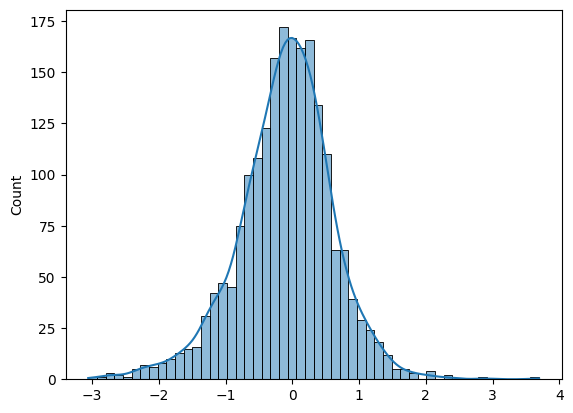

In [20]:
sns.histplot(dt, kde=True)

print(len(count))
print(len(dt))
print(np.nanmean(dt)*24)
print(np.nanstd(dt)*24)

print(np.nanmean(np.abs(dt))*24)

print(np.nanmin(dt))
print(np.nanmax(dt))

print(np.nanmin(np.abs(dt))*24)
print(np.nanmax(np.abs(dt))*24)

In [5]:
print(np.sort(np.abs(dt))[0:21]*24*60)

[0. 0. 1. 1. 2. 2. 3. 3. 4. 4. 4. 5. 5. 5. 6. 6. 6. 7. 8. 8. 8.]


In [14]:

#!curl https://kauai.ccmc.gsfc.nasa.gov/CMEscoreboard/WS/get/predictions?CMEID=2024-03-23T01:48:00-CME-001

# 2023-04-21T18:12:00-CME-001


#direct access to specific event

#os.system('curl https://kauai.ccmc.gsfc.nasa.gov/CMEscoreboard/WS/get/predictions?CMEID=2024-03-23T01:48:00-CME-001')

#time restriction
os.system('curl https://kauai.ccmc.gsfc.nasa.gov/CMEscoreboard/WS/get/predictions ?CMEtimeStart=2024-03-23&CMEtimeEnd=2024-03-26')

#model selection
#os.system('curl https://kauai.ccmc.gsfc.nasa.gov/CMEscoreboard/WS/get/predictions?CMEID=2024-03-23T01:48:00-CME-001&method=CMEFM%20v.0.1')

#os.system('curl https://kauai.ccmc.gsfc.nasa.gov/CMEscoreboard/WS/get/predictions?CMEID=2024-03-23T01:48:00-CME-001&method=ELEvo')


#os.system('curl https://kauai.ccmc.gsfc.nasa.gov/CMEscoreboard/WS/get/predictions?CMEID=2024-03-23T01:48:00-CME-001')


0

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0 4379k    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0

[ {
  "cmeID" : "2024-06-25T05:00:00-CME-001",
  "observedTime" : "2024-06-25T05:00Z",
  "noArrivalObserved" : false,
  "arrivalTime" : "2024-06-28T09:09Z",
  "maxKP" : 7.67,
  "dstMin" : null,
  "dstMinTime" : null,
  "cmeNote" : "Partial halo CME visible to the west in SOHO LASCO C2/C3 and STEREO A COR2. The source is a large filament eruption. The filament extended from approximately N15W55 to S30W15 on the disk, with liftoff seen starting around 2024-06-24T21:40Z in SDO AIA 304. Dimming and post-eruptive loops are visible in SDO AIA 193. The eruption is also visible in STEREO A EUV 195 and 304.",
  "predictions" : [ {
    "predictedMethodName" : "WSA-ENLIL + Cone (NASA M2M)",
    "submissionTime" : "2024-06-25T20:53Z",
    "predictedArrivalTime" : "2024-06-28T14:04Z",
    "uncertaintyMinusInHrs" : 7.0,
    "uncertaintyPlusInHrs" : 7.0,
    "confidenceInPercentage" : null,
    "predictedMaxKpLowerRange" : 3.0,
    "predictedMaxKpUpperRange" : 5.0,
    "predictedDstMin" : null,
    "

 14 4379k   14  631k    0     0   128k      0  0:00:33  0:00:04  0:00:29  128k

In [16]:
import os
import json
os.system('curl https://kauai.ccmc.gsfc.nasa.gov/CMEscoreboard/WS/get/predictions > ATSB.json')
f = open('ATSB.json')
data = json.load(f)
for entry in data:
    for pred in entry['predictions']:
        print (entry['arrivalTime'], pred['predictedArrivalTime'])



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0 4379k    0  8184    0     0   1935      0  0:38:37  0:00:04  0:38:33  1935

2024-06-28T09:09Z 2024-06-28T14:04Z
2024-06-28T09:09Z 2024-06-28T21:00Z
2024-06-28T09:09Z 2024-06-28T01:55Z
2024-06-28T09:09Z 2024-06-28T21:00Z
2024-06-28T09:09Z 2024-06-28T23:30Z
2024-06-28T09:09Z 2024-06-28T18:00Z
2024-06-28T09:09Z 2024-06-29T02:31Z
2024-06-28T09:09Z 2024-06-28T13:06Z
2024-06-28T09:09Z 2024-06-28T06:08Z
2024-06-28T09:09Z 2024-06-28T16:08Z
2024-06-10T16:36Z 2024-06-10T14:31Z
2024-06-10T16:36Z 2024-06-10T19:00Z
2024-06-10T16:36Z 2024-06-10T06:00Z
2024-06-10T16:36Z 2024-06-10T09:44Z
2024-06-10T16:36Z 2024-06-10T06:00Z
2024-06-10T16:36Z 2024-06-10T12:00Z
2024-06-10T16:36Z 2024-06-10T14:35Z
2024-06-10T16:36Z 2024-06-09T23:09Z
2024-06-10T16:36Z 2024-06-10T15:54Z
2024-06-10T16:36Z 2024-06-09T22:21Z
2024-06-10T16:36Z 2024-06-10T09:31Z
2024-05-26T14:35Z 2024-05-27T03:00Z
2024-05-26T14:35Z 2024-05-27T00:01Z
2024-05-26T14:35Z 2024-05-27T01:30Z
2024-05-23T12:53Z 2024-05-23T23:00Z
2024-05-23T12:53Z 2024-05-23T23:00Z
2024-05-22T05:40Z 2024-05-22T23:00Z
2024-05-22T05:40Z 2024-05-22

100 4379k  100 4379k    0     0   854k      0  0:00:05  0:00:05 --:--:--  897k
